In [1]:
import numpy as np
import os
os.chdir('/home/ia404/gitreps/dustbias/mbatch/')
import argparse
import utils as autils
from utils import DUST_TYPES
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from matplotlib import rcParams
rcParams['font.size']=20
rcParams['axes.linewidth']=1.5
rcParams['xtick.major.width']=1.5
rcParams['xtick.minor.width']=1
rcParams['ytick.major.width']=1.5
rcParams['ytick.minor.width']=1
rcParams['xtick.major.pad']='8'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
rcParams['ytick.right'] = True
rcParams['text.usetex'] = True
rcParams['font.family'] = 'Helvetica'

%matplotlib inline

--------------------------------------------------------------------------

  Local host:   login-p-1
  Local device: mlx5_0
--------------------------------------------------------------------------


In [2]:
args = argparse.Namespace()

In [3]:
# args.config_name='act_dr6v4'
# args.mask_type = 'wide_v4_20220316'
# args.mask_subproduct = 'lensing_masks'
args.skyfrac = 'GAL070'
# args.apodfact = '3dg'
args.mlmax=4000
args.lmax=3000
args.lmin=600
args.filter_whiteamplitude=12.
args.filter_whitefwhm=1.4
# args.tilt = -0.8
# args.amplitude = 119.47982655
args.est= 'TT'

In [4]:
path = f'/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/mbatch_ng_240824/'
data_path = lambda x: os.path.join(path, x)

# fit_scaled_params = np.load(data_path(f'stage_data/{autils.get_name_fitparams()}'), allow_pickle=True).item()

In [5]:
# signal
lk, clkk=np.loadtxt('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/sslp/extra/clkk_raw_plikHM_TTTEEE_lowl_lowE_dr6_accuracy.txt',unpack=True)
clpp = clkk * 4 / (lk * (lk+1))**2

/tmp/ipykernel_1029915/621840297.py:3: RuntimeWarning: invalid value encountered in divide
  clpp = clkk * 4 / (lk * (lk+1))**2


In [6]:
ell_arr = np.arange(args.mlmax+1)
lfac =  (ell_arr * (ell_arr + 1))**2 / (2 * np.pi)
lfac_2pt = ell_arr * (ell_arr + 1)
lcut = 500
nbands = 100
lbands = np.concatenate((np.linspace(2, lcut)[:-1], np.logspace(np.log10(lcut), np.log10(args.mlmax), nbands+1)))#  dtype=int)

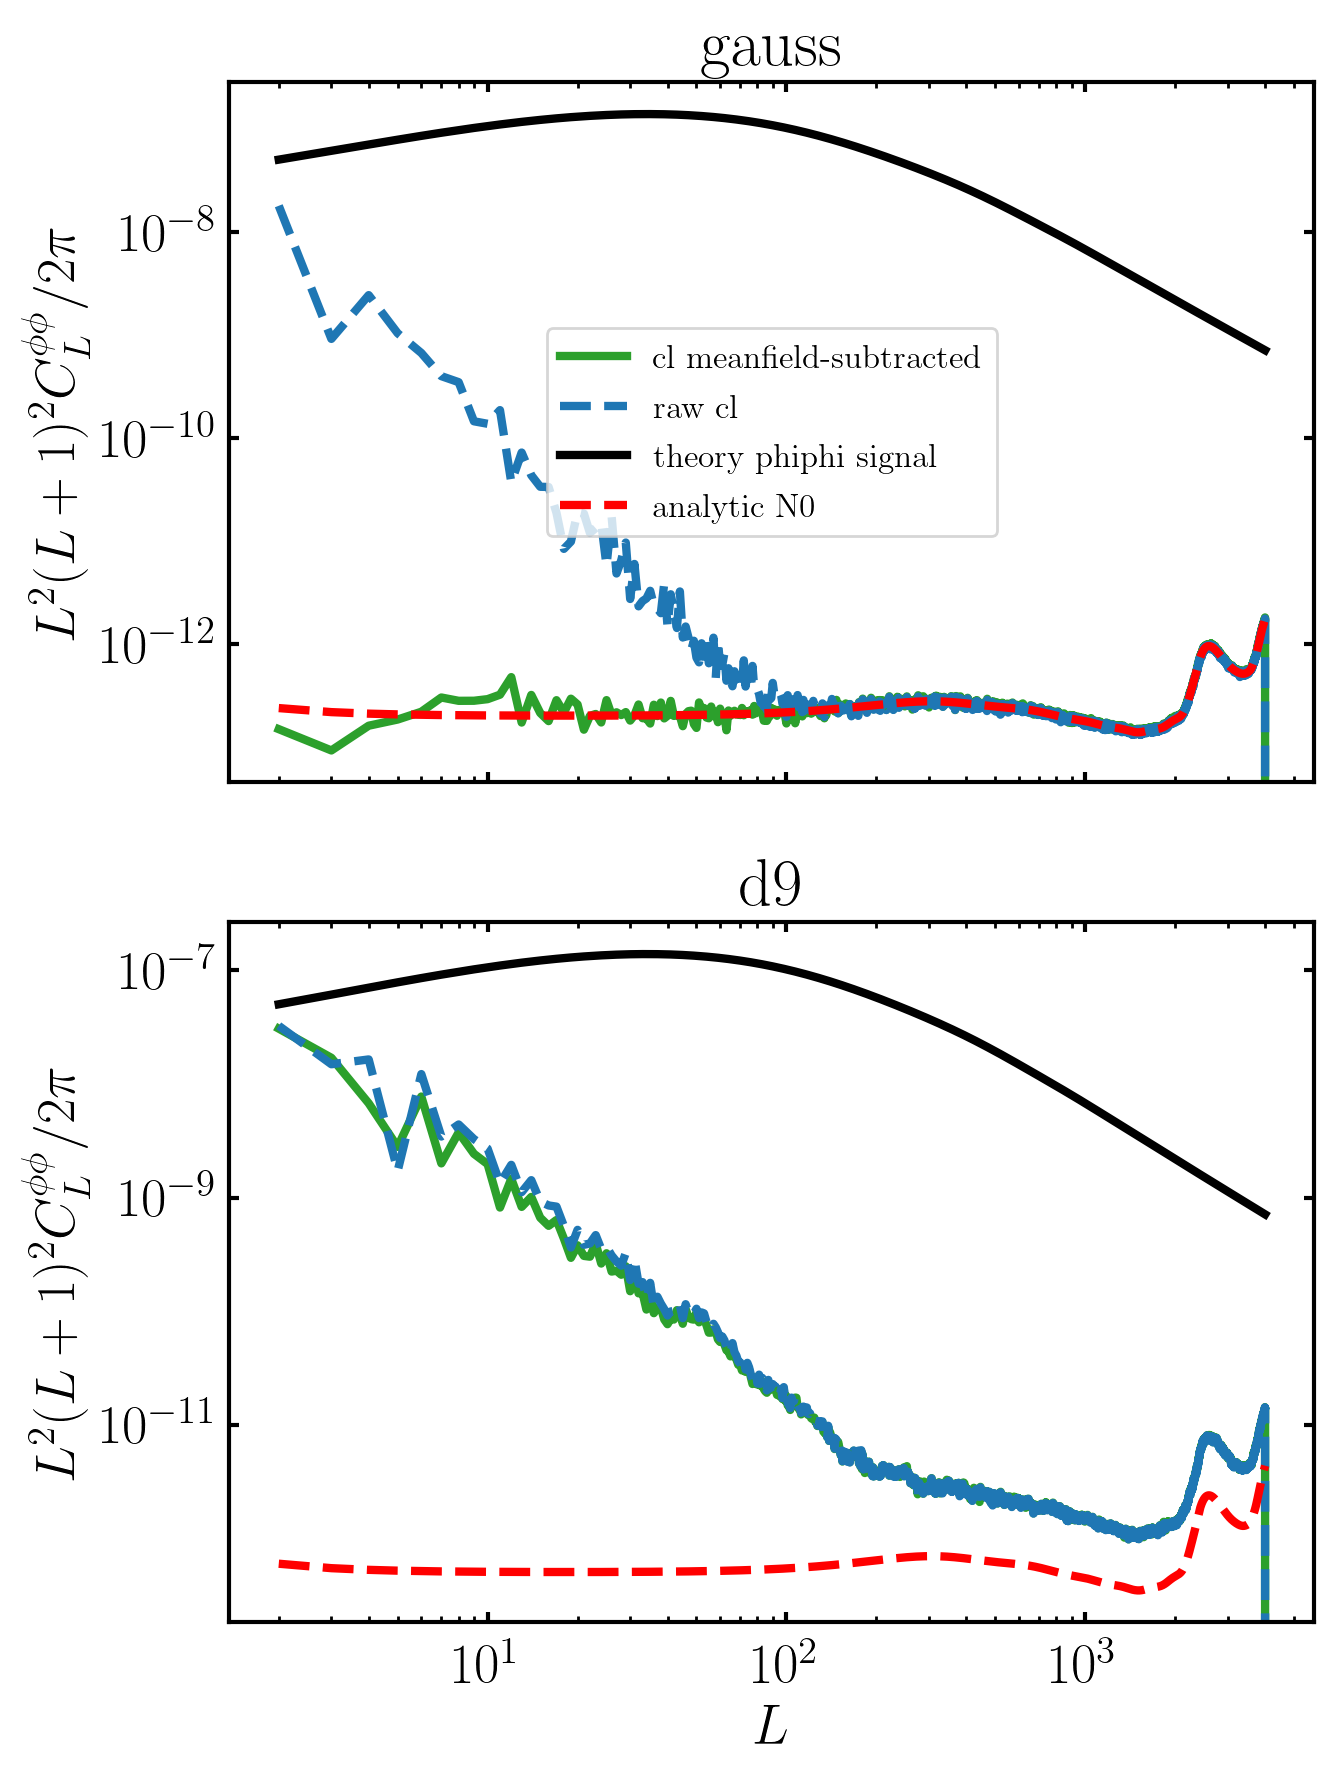

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 10), dpi=200)  #plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,7), dpi = 200)
ax = ax.flatten()
for i, dust_type in enumerate(['gauss', 'd9']):

    args.dust_type = dust_type
    
    # args.tilt, args.amplitude = fit_params['tilt'], fit_params['amplitude']
    cls_4pt = np.loadtxt(data_path(f'stage_auto_{args.skyfrac}/{autils.get_auto_name(args, pl_tag=False, mf=True)}'))
    #cls_4pt_noise0 = np.loadtxt(data_path(f'stage_auto_{args.skyfrac}/{autils.get_auto_name(args, pl_tag=False, mf=True, tag="set00")}'))
    cls_4pt_nomf = np.loadtxt(data_path(f'stage_auto_{args.skyfrac}/{autils.get_auto_name(args, pl_tag=False, mf=False)}'))
    N0_TT = np.loadtxt(data_path(f'stage_auto_{args.skyfrac}/{autils.get_N0_TT_name(args, pl_tag=False, tag="smoothed")}'))

    ax[i].loglog(ell_arr[2:], (cls_4pt[:args.mlmax+1]*lfac)[2:], color='tab:green', linewidth = 3, label='cl meanfield-subtracted') # linestyle = 'dotted', color ='b', linewidth = 3,
    #ax.loglog(ell_arr[2:], (cls_4pt_noise0[:args.mlmax+1]*lfac)[2:],label='cl meanfield set00')
    ax[i].loglog(ell_arr[2:], (cls_4pt_nomf[:args.mlmax+1]*lfac)[2:], color='tab:blue', linestyle='dashed', linewidth = 3, label='raw cl')

    ax[i].loglog(ell_arr[2:], (clpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3, label='theory phiphi signal')
    ax[i].loglog(ell_arr[2:], (N0_TT[:args.mlmax+1]*lfac)[2:], linestyle = 'dashed', color ='r', linewidth = 3, label='analytic N0')
    #ax.set_xlim(10, 3000)
    ax[i].set_title(f'{args.dust_type}')

    #fig.savefig("/home/ia404/gitreps/dustbias/mbatch/Figures/phi_TT_gauss_dust_lmin600_lmax300_WITHN0_MF.png", bbox_inches='tight')
ax[0].legend(prop={'size': 12})
ax[1].set_xlabel(r'$L$')
for i in range(2):
    ax[i].set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$')

plt.subplots_adjust(hspace=0.2)

fig.savefig('/home/ia404/gitreps/dustbias/mbatch/Figures/ng_models_brokenMF.jpg', bbox_inches='tight')
plt.show()